# **Week 4 notebook**

### **Exercise 7.5:**

<img src="SymPyBilleder/2025-09-22-09-21-15.png" width="550">

##### **1.**

The communalities are the squared row sums of matrix $A$, so in our $A$ matrix we have three rows and the first row aka the first communality is then:
$$
h_1^2 = \left( \frac{2}{3} \right)^2 + \left( \frac{1}{3} \right)^2 = \frac{5}{9}
$$
Next:
$$
h_2^2 = \left( \frac{1}{3} \right)^2 + \left( \frac{1}{3} \right)^2 = \frac{2}{9}
$$
Finally:
$$
h_3^2 = \left( \frac{-1}{3} \right)^2 + \left( \frac{2}{3} \right)^2 = \frac{5}{9}
$$
These are, therefore, our three communalities.

##### **2.**

First we need to find matrix $R$, given as:
$$
R = AA^T+\Delta
$$
Here, $\Delta$ is the diagonal matrix of $G$, so:
$$
\Delta = \begin{pmatrix} \frac{4}{9} & 0 & 0 \\ 0 & \frac{7}{9} & 0 \\ 0 & 0 & \frac{4}{9} \end{pmatrix}
$$

In [22]:
A <- matrix(c(2/3,1/3,-1/3,1/3,1/3,2/3), nrow=3, ncol=2)

F_mean <- matrix(c(0,0), nrow=2)
G_mean <- matrix(c(0,0,0), nrow=3)
F_var <- matrix(c(1,0,0,1), nrow=2)

G_var <- matrix(c(4/9,0,0,0,7/9,0,0,0,4/9), nrow=3)

# We find R:
R <- A %*% t(A) + G_var
R

1.000000e+00,0.3333333,-1.233581e-17
3.333333e-01,1.0000000,1.111111e-01
-1.233581e-17,0.1111111,1.000000e+00


The above output shows the dispersion of $X$:
$$
R= \begin{pmatrix} 1 & 0.33 & 0 \\ 0.33 & 1 & 0.11 \\ 0 & 0.11 & 1 \end{pmatrix}
$$
Furthermore, the mean is $0$ because both $F$ and $G$ have mean $0$.

##### **3.**

We use the formula found on slide 17 from week 3, where the first partial correlation will be:
$$
\rho_{1|23}^2 = \Sigma_{1,23} \Sigma_{23,23}^{-1} \Sigma_{23,1}
$$
We recall our matrix, so $\Sigma_{1,23}$ is:
$$
\Sigma_{1,23} = \begin{pmatrix} 0.33 & 0 \end{pmatrix}
$$
For the next ones:
$$
\Sigma_{23,23} = \begin{pmatrix} 1 & 0.11 \\ 0.11 & 1 \end{pmatrix}
$$
Then:
$$
\Sigma_{23,1} = \begin{pmatrix} 0.33 \\ 0 \end{pmatrix}
$$
We do this in R.

In [23]:
Sigma_1.23 <- matrix(c(0.33,0), nrow=1)
Sigma_23.23 <- matrix(c(1,0.11,0.11,1), nrow=2)
Sigma_23.1 <- matrix(c(0.33,0), nrow=2)

Sigma_1.23 %*% solve(Sigma_23.23) %*% Sigma_23.1

0.1102338


In [24]:
# For the next one rho_{2|12}:

Sigma_2.13 <- matrix(c(0.33,0.11), nrow=1)
Sigma_13.13 <- matrix(c(1,0,0,1), nrow=2)
Sigma_13.2 <- matrix(c(0.33, 0.11), nrow=2)

Sigma_2.13 %*% solve(Sigma_13.13) %*% Sigma_13.2

0.121


In [25]:
# Then for rho_{3|12}:
Sigma_3.12 <- matrix(c(0,0.11), nrow=1)
Sigma_12.12 <- matrix(c(1,0.33,0.33,1), nrow=2)
Sigma_12.3 <- matrix(c(0,0.11), nrow=2)

Sigma_3.12 %*% solve(Sigma_12.12) %*% Sigma_12.3

0.01357872


Hence, we get:
$$
\rho_{1|23}^2 = 0.110
$$
$$
\rho_{2|12}^2 = 0.121
$$
$$
\rho_{3|12}^2 = 0.014
$$

##### **4.**

Firstly we know that $D(X)=R$, and we have already found $R$, and now we must fin the inverse of $R$. To do this on a $3\times3$ matrix, we use the formula:
$$
A^{-1} = \frac{1}{\text{det}(A)} \text{adj}(A)
$$
But we would have to find determinant of our matrix and the adjoint matrix manually... We could also just use R to find the inverse of $R$.

In [26]:
solve(R)

1.12676056,-0.3802817,0.04225352
-0.38028169,1.1408451,-0.12676056
0.04225352,-0.1267606,1.01408451


##### **5.**

Firslty, since the mean of $F$ and $G$ is $0$, then the mean of $X$ is also $0$, but we can find the variance via:
$$
V\begin{bmatrix} F \\ X \end{bmatrix} = \begin{bmatrix} I & A^T \\ A & R \end{bmatrix}
$$
Here:
$$
A = \begin{bmatrix} \frac{2}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{1}{3} \\ \frac{-1}{3} & \frac{2}{3} \end{bmatrix}
$$
$$
A^T = \begin{bmatrix} \frac{2}{3} & \frac{1}{3} & \frac{-1}{3} \\ \frac{1}{3} & \frac{1}{3} & \frac{2}{3} \end{bmatrix}
$$
$$
R = \begin{bmatrix} 1 & 0.33 & 0 \\ 0.33 & 1 & 0.11 \\ 0 & 0.11 & 1 \end{bmatrix}
$$
The full matrix becomes:
$$
V\begin{bmatrix} F \\ X \end{bmatrix} = \begin{bmatrix} 1 & 0 & \frac{2}{3} & \frac{1}{3} & \frac{-1}{3} \\ 0 & 1 & \frac{1}{3} & \frac{1}{3} & \frac{2}{3} \\ \frac{2}{3} & \frac{1}{3} & 1 & 0.33 & 0 \\ \frac{1}{3} & \frac{1}{3} & 0.33 & 1 & 0.11 \\ \frac{-1}{3} & \frac{2}{3} & 0 & 0.11 & 1 \end{bmatrix}
$$
So here we have the variance matrix, and again, the mean is just $0$.

NOTE: solution gets something different :(((.

##### **6.**

We have to find $(F|X=x)$ and from the slides, we know the formulas:
$$
E(F|X=x) = \mu_F + A^TR^{-1}(x_2-\mu_X)
$$
$$
= A^TR^{-1}x
$$
This is because our mean values are all $0$.

Next, we recall that:
$$
A = \begin{bmatrix} \frac{2}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{1}{3} \\ \frac{-1}{3} & \frac{2}{3} \end{bmatrix}
$$
And that:
$$
R = \begin{bmatrix} 1 & 0.33 & 0 \\ 0.33 & 1 & 0.11 \\ 0 & 0.11 & 1 \end{bmatrix}
$$
Hence, we get:
$$
E(F|X=x) = \begin{bmatrix} \frac{2}{3} & \frac{1}{3} \\ \frac{1}{3} & \frac{1}{3} \\ \frac{-1}{3} & \frac{2}{3} \end{bmatrix}\begin{bmatrix} 1 & 0.33 & 0 \\ 0.33 & 1 & 0.11 \\ 0 & 0.11 & 1 \end{bmatrix}x
$$
$$
= \begin{bmatrix} 0.74 & 0.44 & 0.04 \\ 0.44 & 0.44 & 0.07 \end{bmatrix}x
$$
This is the mean of the conditional distribution, and we found the variance above.

##### **7.**

We can predict $F$ given that we observed $X$ using our conditional means and variances found above to build a model?

##### **8.**

In Factor Analysis we have assumptions that there underlying factors that explain the data. We assume that the factors and unique factors are
uncorrelated. But these can lead to uncertainties in the predicted values.

### **Exercise 7.7:**

<img src="SymPyBilleder/2025-09-22-09-21-42.png" width="550">

##### **1.**

In [39]:
olympic <- read.csv2("../data/heptathlon.csv")
head(olympic)

# Exclude name and points:
olympic_filtered <- olympic[,3:9]
head(olympic_filtered)

,Name,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,"Schulz,(GDR)",6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,13.75,1.83,13.50,24.65,6.33,42.82,125.79


In [48]:
# Now factor analysis with n=2:
# Slide 44:
library(psych)

#### Factor analysis 2 Factors #### 
fa2 <- principal(cor(olympic_filtered), nfactors = 2,rotate = "varimax") 
fa21 <- fa2$loadings[,1:2] 
fa2com <- fa2$communality 

##### **2.**

In [49]:
# Factor patterns:
fa21

,RC1,RC2
Hurdles,0.96904538,-0.04986118
High.Jump,-0.83885384,-0.06041963
Shot,-0.64656995,0.53116479
Run200,0.76820184,-0.44140527
Longjump,-0.94657391,0.18224443
Javelin,0.07491091,0.92910851
Run800,0.82419326,0.04040023


Here, we see that athletes with high factor 1 means that they are strong in those activities like hurdles and run200, and this also applies for factor 2 values. We see that athletes that are good at long term activites like running will be good in mostly those sports, but bad at longer short term sports like shot and jump. Meanwhile, athletes that are worse in run activites, they are good at the more short-term power requiring abilities.

In [51]:
# We also try for non-rotated:
#### Factor analysis 2 Factors #### 
fa2r <- principal(cor(olympic_filtered), nfactors = 2,rotate = "none") 
fa21r <- fa2r$loadings[,1:2] 
fa2comr <- fa2r$communality 

fa21r

,PC1,PC2
Hurdles,-0.9527330,0.18394262
High.Jump,0.7998971,-0.25979027
Shot,0.7550672,0.36064144
Run200,-0.8516293,-0.24433641
Longjump,0.9626588,-0.05003306
Javelin,0.1500479,0.91996733
Run800,-0.7904642,0.23683966


For the non_rotated, athlete with high Factor 1 in unrotated is good at jumps and throws, poor at runs (since hurdles/run200/run800 are strongly negative). Next, athlete with high Factor 2 in unrotated is good at javelin (and to some extent shot).

Rotated solution shows the first factor becomes much cleaner (running against jumps), and the second is clearly throwing. The rotation doesn’t change the mathematical information, just the interpretability.

##### **3.**

First for rotated:

In [52]:
# variance explained:
colSums(fa21[,1:2]^2)

# total communality
sum(rowSums(fa21[,1:2]^2))
# or: sum(fa21com)

# single communalities:
fa2com

RC1      RC2 
4.231820 1.381199

[1] 5.613019

Hurdles High.Jump      Shot    Run200  Longjump   Javelin    Run800 
0.9415351 0.7073263 0.7001887 0.7849727 0.9292152 0.8688543 0.6809267

Then for non rotated:

In [53]:
# variance explained:
colSums(fa21r[,1:2]^2)

# total communality
sum(rowSums(fa21r[,1:2]^2))
# or: sum(fa21com)

# single communalities:
fa2comr

PC1      PC2 
4.416994 1.196025

[1] 5.613019

Hurdles High.Jump      Shot    Run200  Longjump   Javelin    Run800 
0.9415351 0.7073263 0.7001887 0.7849727 0.9292152 0.8688543 0.6809267

We see that the variance explained by the first two factors for rotated ones is RC1: 4.231819816562 and RC2: 1.38119913367146, but for the non rotated ones we get PC1: 4.41699433081105 and PC2: 1.19602461942242.

Then, in both cases, the total communality is 5.61301895023346.

##### **4.**

In [58]:
fa21
fa21r

,RC1,RC2
Hurdles,0.96904538,-0.04986118
High.Jump,-0.83885384,-0.06041963
Shot,-0.64656995,0.53116479
Run200,0.76820184,-0.44140527
Longjump,-0.94657391,0.18224443
Javelin,0.07491091,0.92910851
Run800,0.82419326,0.04040023


,PC1,PC2
Hurdles,-0.9527330,0.18394262
High.Jump,0.7998971,-0.25979027
Shot,0.7550672,0.36064144
Run200,-0.8516293,-0.24433641
Longjump,0.9626588,-0.05003306
Javelin,0.1500479,0.91996733
Run800,-0.7904642,0.23683966


We compute the two numbers in R.

In [61]:
rotated <- (0.96904538)^2 + (0.04986118)^2
non_rotated <- (-0.9527330)^2 + (0.18394262)^2

rotated
non_rotated

[1] 0.9415351

[1] 0.9415351

For both cases, we see that ober $94\%$ of the variance in hurdles is explained by the two factors. The similarity for both cases show how rotation does not change communalities, it rather just changes the distribution of variance explained by each factor.

##### **5.**

In [67]:
#### Factor analysis 3 Factors #### 
fa3 <- principal(cor(olympic_filtered), nfactors = 3,rotate = "varimax") 
fa31 <- fa3$loadings[,1:3] 
fa3com <- fa3$communality 

fa31

,RC1,RC3,RC2
Hurdles,0.82655571,-0.5052596,0.061507703
High.Jump,-0.87049868,0.1936952,-0.008247107
Shot,-0.22871051,0.9127234,0.154726762
Run200,0.53100113,-0.6728352,-0.242267458
Longjump,-0.72010253,0.6489285,-0.008270361
Javelin,0.04077065,0.1534899,0.984432817
Run800,0.83640249,-0.2215291,0.007076705


In [69]:
# variance explained:
colSums(fa31[,1:3]^2)

# total communality
sum(rowSums(fa31[,1:3]^2))
# or: sum(fa21com)

# single communalities:
fa3com

RC1      RC3      RC2 
2.995012 2.072319 1.055712

[1] 6.123042

Hurdles High.Jump      Shot    Run200  Longjump   Javelin    Run800 
0.9422648 0.7953538 0.9093129 0.7933630 0.9397242 0.9943294 0.7486943

We see that toal communality for the 3 factors is 6.12 out of 7 variables, so factor 3 explains $6.12/7=0.87$ of the variance in the variables. Before, we had communality of $5.61$ out of $7$, so $5.61/7=0.80$. Hence, adding the third factor increased the communality by $0.07$, so adding this extra factor had increased the total variance explained.

##### **6.**

In [75]:
# Now for unrotated:
#### Factor analysis 3 Factors #### 
fa3r <- principal(cor(olympic_filtered), nfactors = 3,rotate = "none") 
fa31r <- fa3r$loadings[,1:3] 
fa3comr <- fa3r$communality 

fa31r
fa31

,PC1,PC2,PC3
Hurdles,-0.9527330,0.18394262,0.02701241
High.Jump,0.7998971,-0.25979027,-0.29669430
Shot,0.7550672,0.36064144,0.45730099
Run200,-0.8516293,-0.24433641,-0.09159858
Longjump,0.9626588,-0.05003306,0.10251349
Javelin,0.1500479,0.91996733,-0.35422467
Run800,-0.7904642,0.23683966,0.26032215


,RC1,RC3,RC2
Hurdles,0.82655571,-0.5052596,0.061507703
High.Jump,-0.87049868,0.1936952,-0.008247107
Shot,-0.22871051,0.9127234,0.154726762
Run200,0.53100113,-0.6728352,-0.242267458
Longjump,-0.72010253,0.6489285,-0.008270361
Javelin,0.04077065,0.1534899,0.984432817
Run800,0.83640249,-0.2215291,0.007076705


We see that there are big differences for some variables, especially javelin, which has -0.35 for unrotated, but 0.98 for rotated factors, and also run800 has 0.007 for rotated and 0.26 for unrotated.

##### **7.**

We get this scoreplot below?

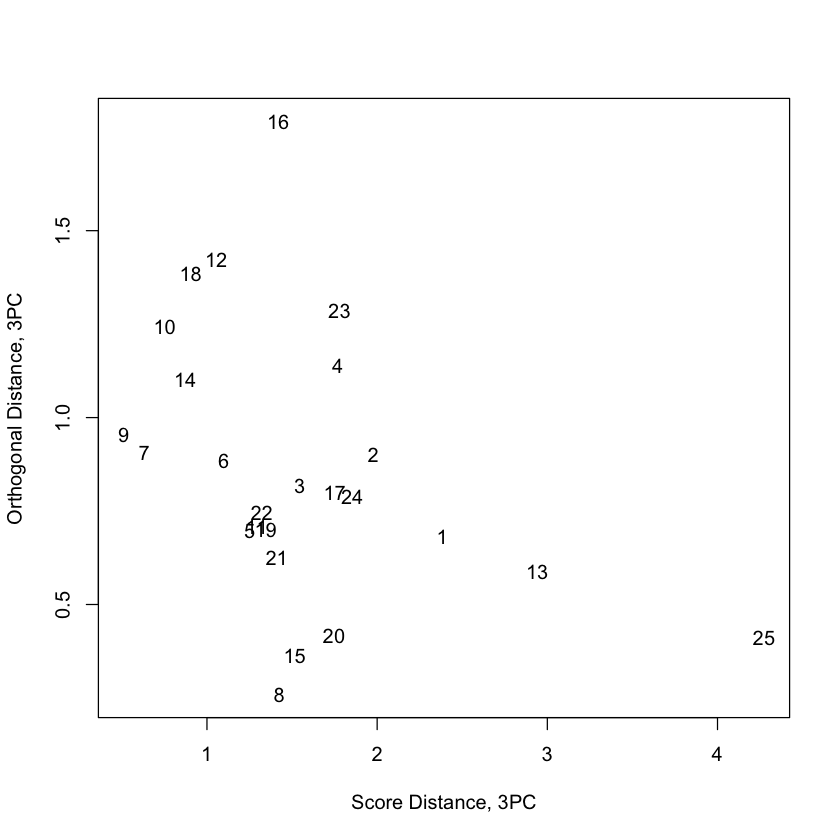

In [81]:
olympic.PCA<- princomp(olympic_filtered, cor = TRUE)
res<-pcaDiagplot(olympic_filtered, olympic.PCA, a=3,plot=F)

plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 3PC",
     ylab="Orthogonal Distance, 3PC")
text(res$SDist, res$ODist)

We luckily do not have strong outlier athletes, as they would be present in the top right corner.

##### **8.**

We see, for instance, that athlete 25 excel in factor 1, so they are good at running events, meanwhile athlete 16 excel at throwing events.

# **Slide D in R code**

,Name,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,"Schulz,(GDR)",6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


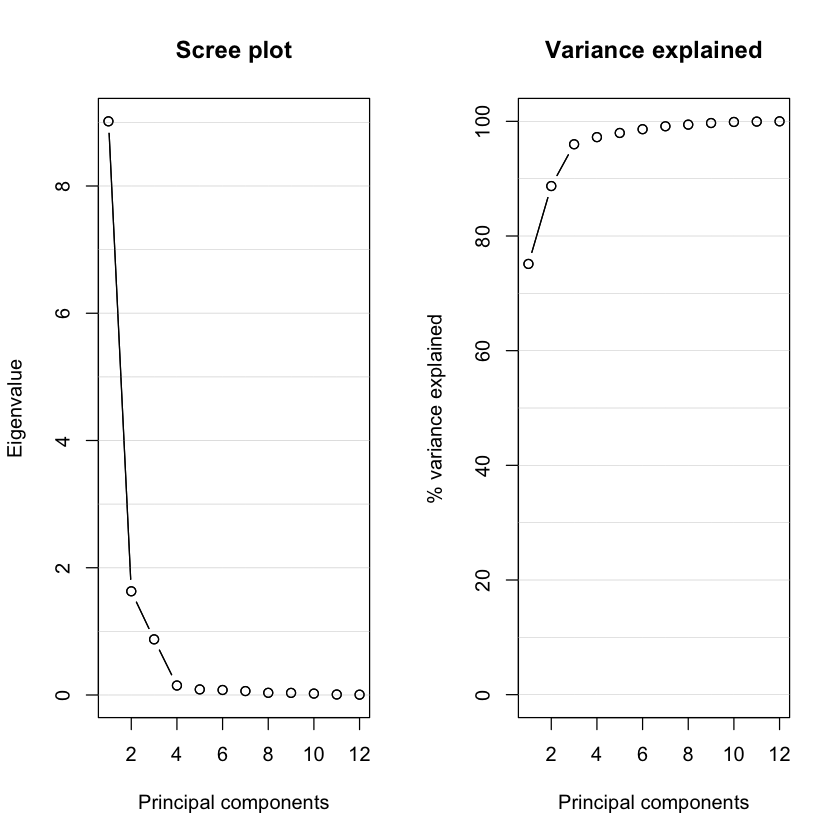

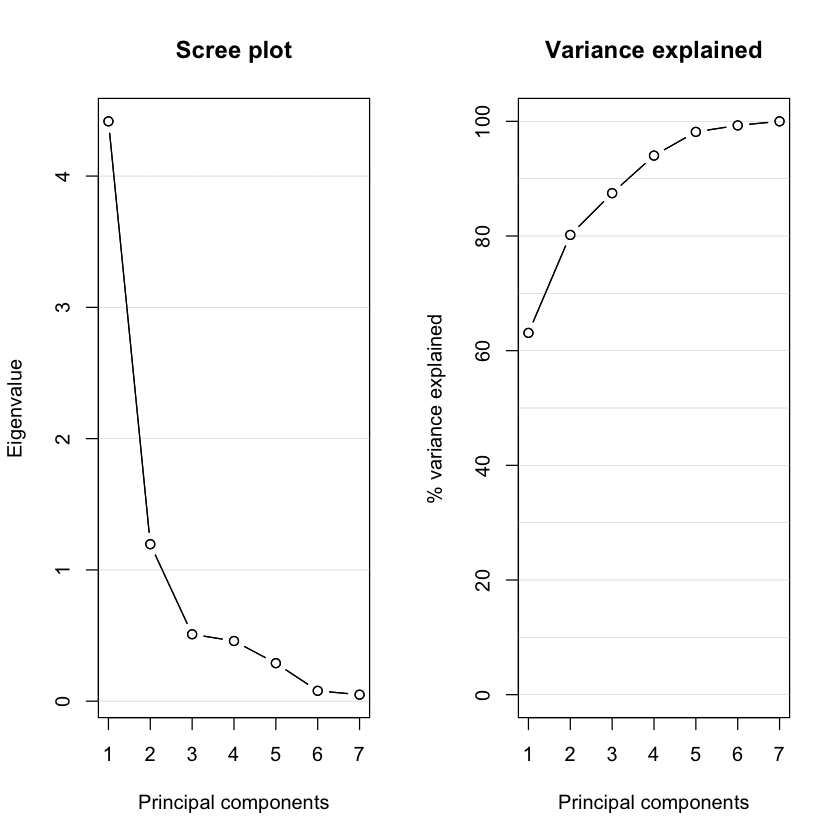

In [ ]:
# Slide 25:

lambda<-c(9.01626784,1.62996970,0.87459018,0.14911589,
          0.087459018,0.07875169,0.06162583,0.03445767,
          0.03319704,0.02235388,0.00796802,0.00516771)

par(mfrow=c(1,2))
plot(1:12,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:9){
  lines(0:14,rep(i,15),col="lightgrey",lwd=0.5)
  }
lines(1:12,lambda,type="b")
plot(1:12,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:14,rep(10*i,15),col="lightgrey",lwd=0.5)
  }
lines(1:12,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))

# Slide 26:

heptathlon<-read.csv2("../data/heptathlon.csv")

head(heptathlon)
X<-heptathlon[,-(1:2)]
Sigma<-cor(X)

lambda<-eigen(Sigma)$values

par(mfrow=c(1,2))
plot(1:7,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:4){
  lines(0:14,rep(i,15),col="lightgrey",lwd=0.5)
  }
lines(1:7,lambda,type="b")
plot(1:7,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:14,rep(10*i,15),col="lightgrey",lwd=0.5)
  }
lines(1:7,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))


The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpimNQ3W/downloaded_packages


Warning message:
“package ‘remotes’ was built under R version 4.3.3”
Using GitHub PAT from the git credential store.

Skipping install of 'ChemometricsWithR' from a github remote, the SHA1 (9d15f509) has not changed since last install.
  Use `force = TRUE` to force installation


Attaching package: ‘ChemometricsWithR’


The following objects are masked from ‘package:stats’:

    loadings, screeplot




,longax,intermax,shortax,longdia,ratspher,ratax,ratarvol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.76,3.66,0.54,5.275,9.768,13.741,4.782
2,8.59,4.99,1.34,10.022,7.500,10.162,2.130
3,6.22,6.14,4.52,9.842,2.175,2.732,1.089
4,7.57,7.28,7.07,12.662,1.791,2.101,0.822
5,9.03,7.08,2.59,11.762,4.539,6.217,1.276
6,5.51,3.98,1.30,6.924,5.326,7.304,2.403


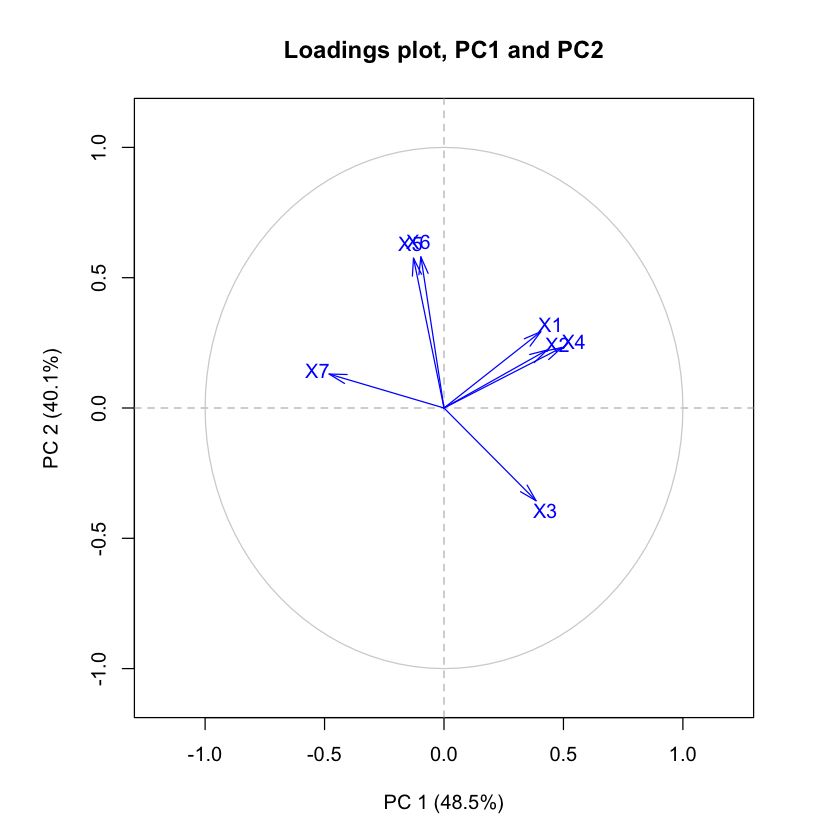

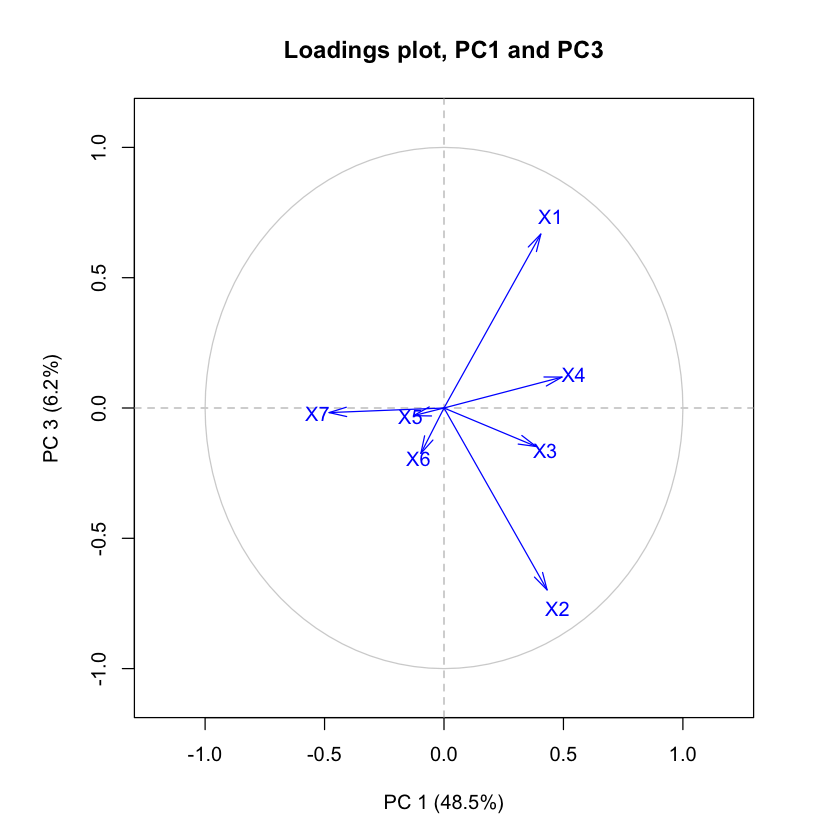

,PC 1,PC 2,PC 3
X1,0.40529248,0.2928989,0.66735703
X2,0.43158146,0.2224438,-0.69798887
X3,0.38544111,-0.3558811,-0.14769067
X4,0.49388987,0.2322712,0.11864031
X5,-0.12770922,0.5751049,-0.02944297
X6,-0.09680307,0.5800041,-0.17430323
X7,-0.48093962,0.1302972,-0.01759442


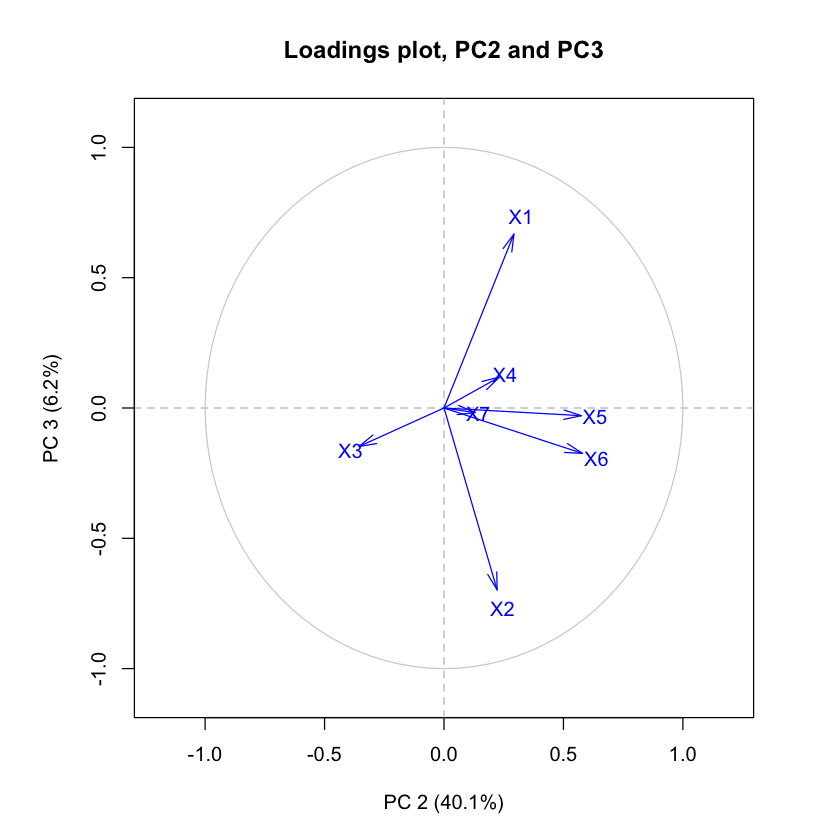

In [ ]:
#Slide 28:

install.packages("remotes")
library(remotes)
install_github("rwehrens/ChemometricsWithR")

library(ChemometricsWithR)
boxdata<-read.csv2("../data/BoxData.csv")
head(boxdata)
boxdata2<-boxdata
names(boxdata2)<-paste("X",1:7,sep="")

boxdata.PC<- PCA(scale(boxdata2))

loadingplot(boxdata.PC,show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC1 and PC2")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

loadingplot(boxdata.PC,pc=c(1,3),show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC1 and PC3")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

loadingplot(boxdata.PC,pc=c(2,3),show.names = TRUE,xlim=c(-1,1),ylim=c(-1,1),
            main="Loadings plot, PC2 and PC3")
lines(cos((0:100)*2*pi/100),sin((0:100)*2*pi/100),col="lightgrey")

boxdata.PC$loadings[,1:3]

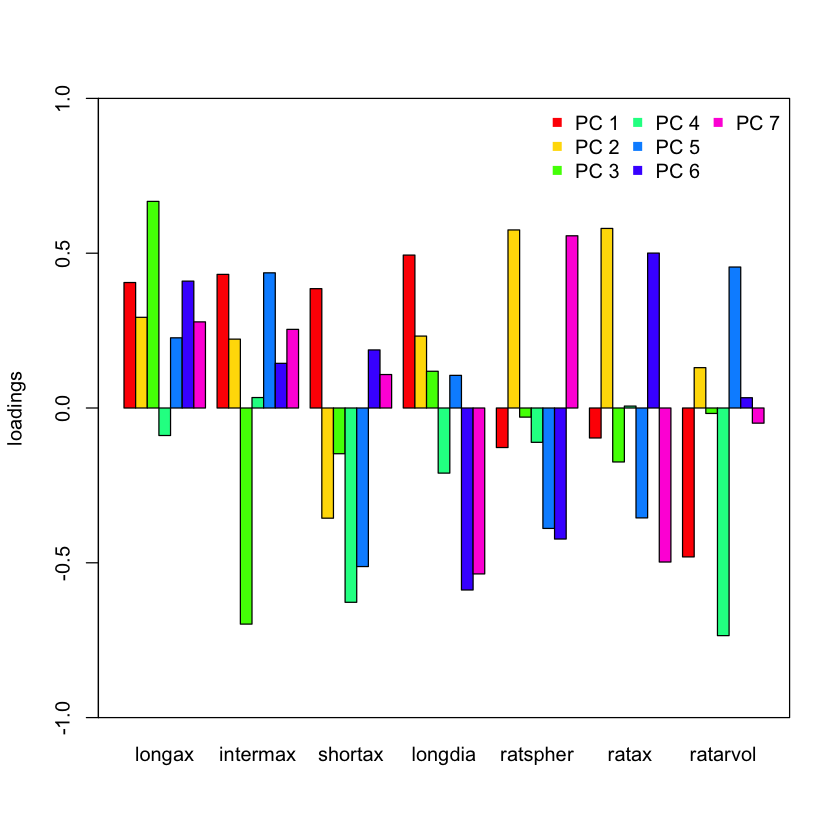

In [5]:
# Slide 29:

barplot(t(boxdata.PC$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings")
legend("topright",paste("PC",1:7),col=rainbow(7),pch=15,ncol=3,bty="n")
box()

Warning message:
“package ‘chemometrics’ was built under R version 4.3.3”
Loading required package: rpart



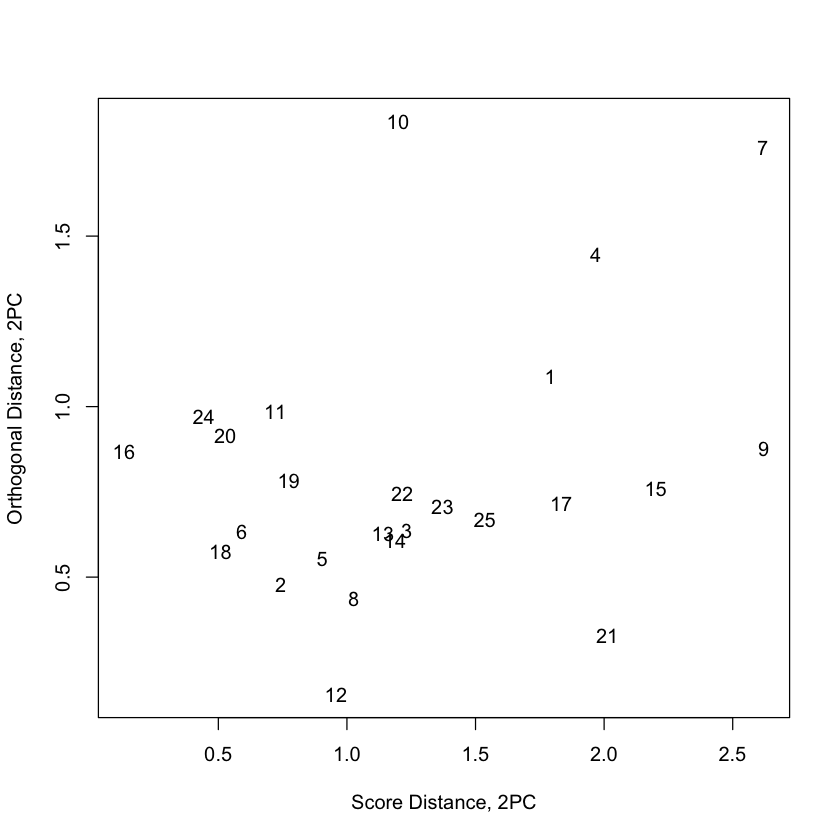

In [6]:
# Slide 31:

library(chemometrics)
boxdata.PCA<- princomp(boxdata, cor = TRUE)
res<-pcaDiagplot(boxdata, boxdata.PCA, a=2,plot=F)

plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 2PC",
     ylab="Orthogonal Distance, 2PC")
text(res$SDist, res$ODist, labels=as.character(1:25))

In [7]:
# Slide 32
boxdata[c(4,7),]
summary(boxdata)

,longax,intermax,shortax,longdia,ratspher,ratax,ratarvol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7.57,7.28,7.07,12.662,1.791,2.101,0.822
7,3.27,0.62,0.44,3.357,7.629,8.838,8.389


     longax        intermax        shortax         longdia      
 Min.   :1.66   Min.   :0.620   Min.   :0.440   Min.   : 2.799  
 1st Qu.:5.51   1st Qu.:3.010   1st Qu.:1.170   1st Qu.: 6.924  
 Median :7.57   Median :4.920   Median :1.570   Median : 9.716  
 Mean   :7.10   Mean   :4.773   Mean   :2.349   Mean   : 9.134  
 3rd Qu.:9.03   3rd Qu.:6.440   3rd Qu.:3.310   3rd Qu.:11.742  
 Max.   :9.84   Max.   :9.490   Max.   :7.070   Max.   :13.604  
    ratspher          ratax           ratarvol    
 Min.   : 1.783   Min.   : 2.087   Min.   :0.822  
 1st Qu.: 2.760   1st Qu.: 3.509   1st Qu.:1.276  
 Median : 4.539   Median : 5.382   Median :2.013  
 Mean   : 5.458   Mean   : 7.167   Mean   :2.346  
 3rd Qu.: 7.629   3rd Qu.: 9.909   3rd Qu.:2.616  
 Max.   :13.133   Max.   :18.519   Max.   :8.389  

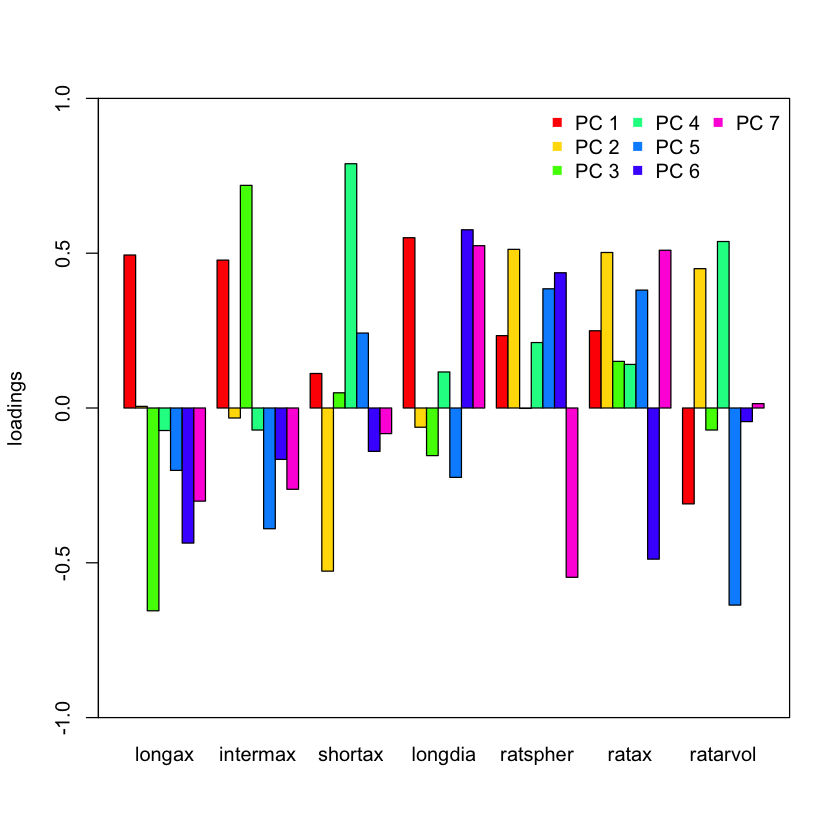

In [8]:
# Slide 33

boxdata.PC2<- PCA(scale(boxdata2[-c(4,7),]))

barplot(t(boxdata.PC2$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings")
legend("topright",paste("PC",1:7),col=rainbow(7),pch=15,ncol=3,bty="n")
box()

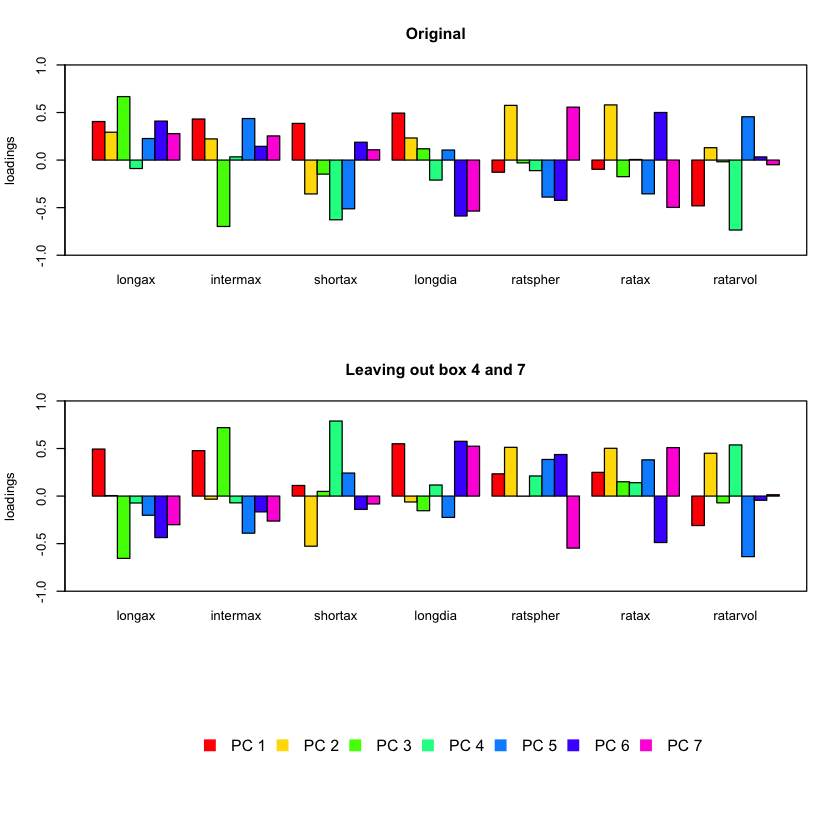

In [9]:
# Slide 34:

par(mfrow=c(2,1))
layout.matrix<-matrix(c(1,1,2,2,3),ncol=1)
layout(layout.matrix)

barplot(t(boxdata.PC$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings",main ="Original")
box()

barplot(t(boxdata.PC2$loadings), beside=T,col=rainbow(7),ylim=c(-1,1),
         names.arg=names(boxdata),ylab="loadings",
         main ="Leaving out box 4 and 7")
box()

plot(1:10,1:10,pch="",xlab='',ylab='',axes=F)
legend(1,15,paste("PC",1:7),col=rainbow(7),pch=15,ncol=7,bty="n",
cex=1.2,pt.cex=2,x.intersp=1.5,xjust=-0.2)

par(mfrow=c(1,1))

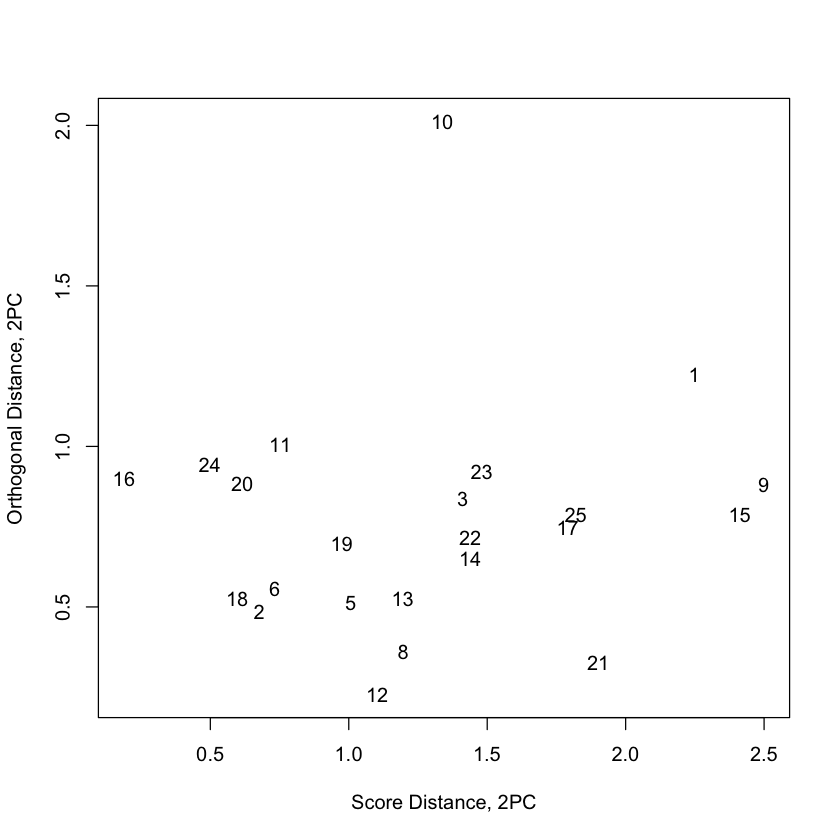

In [10]:
# Slide 36:

boxdata.PCA2<- princomp(boxdata[-c(4,7),], cor = TRUE)
res<-pcaDiagplot(boxdata[-c(4,7),], boxdata.PCA2, a=2,plot=F)


plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 2PC",
     ylab="Orthogonal Distance, 2PC")
text(res$SDist, res$ODist, labels=as.character(1:25)[-c(4,7)])

Warning message:
“package ‘car’ was built under R version 4.3.3”
Loading required package: carData



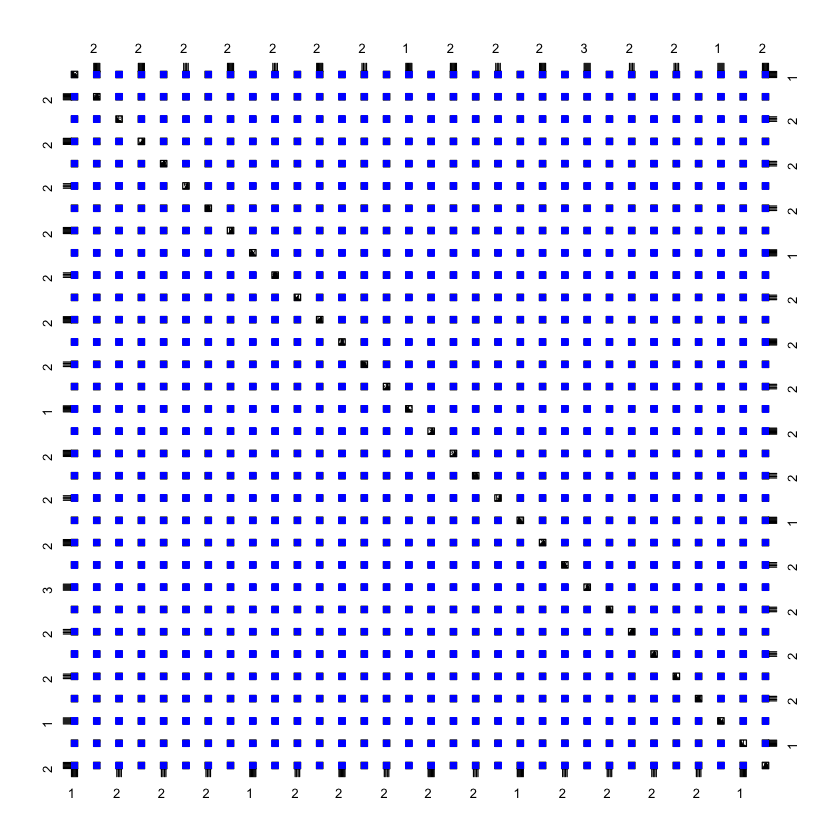

In [13]:
# Slide 38:

stanford<-read.csv2("../data/stanford.csv")

library(car)
scatterplotMatrix(stanford,regLine=F,smooth=F,
  ellipse=list(levels=0.9, robust=TRUE, fill=F),
  diagonal=list(method="histogram", breaks="FD"))

In [15]:
# Slide 39:

par(mfrow=c(6,6))
for(i in 1:32){hist(stanford[,i],main=names(stanford)[i],xlab='Score',
    xlim=c(1,9))}
par(mfrow=c(1,1))

ERROR: Error in plot.new(): figure margins too large


,Eigenvalue,Proportion,Cumulative
,<dbl>,<dbl>,<dbl>
1,7.2407068,0.2263,0.2263
2,4.5250901,0.1414,0.3677
3,3.1240573,0.0976,0.4653
4,2.3335890,0.0729,0.5382
5,1.8783611,0.0587,0.5969
6,1.1940636,0.0373,0.6342
7,0.9268636,0.0290,0.6632


0.22699742,-0.08136130,-0.114306186,0.024592445,0.223300271,-0.16281755
-0.18398264,0.09944509,0.352938974,-0.057072997,0.012064855,-0.03771747
0.17055925,0.19423134,0.170852977,-0.133911651,0.044995521,-0.37905011
-0.16176302,-0.26793008,0.066104594,0.001440412,0.123785889,-0.26010217
0.13909328,-0.17461656,0.118622573,-0.390410342,-0.028904740,-0.02300693
-0.12247025,0.08319317,-0.166088296,-0.355815283,0.147211093,-0.10586051
0.15615878,-0.22924412,0.163212072,-0.313223224,-0.065917973,-0.00208677
-0.19225899,-0.06564870,-0.141675102,-0.300662475,0.125511789,0.15041367
0.12633941,-0.03021714,0.282788375,0.040404111,0.309201474,0.19135224
-0.11230888,0.26305076,-0.187558242,0.090518359,0.278131117,0.02190586
0.14731039,0.27575839,0.122226826,-0.152815819,-0.002829893,-0.36189558


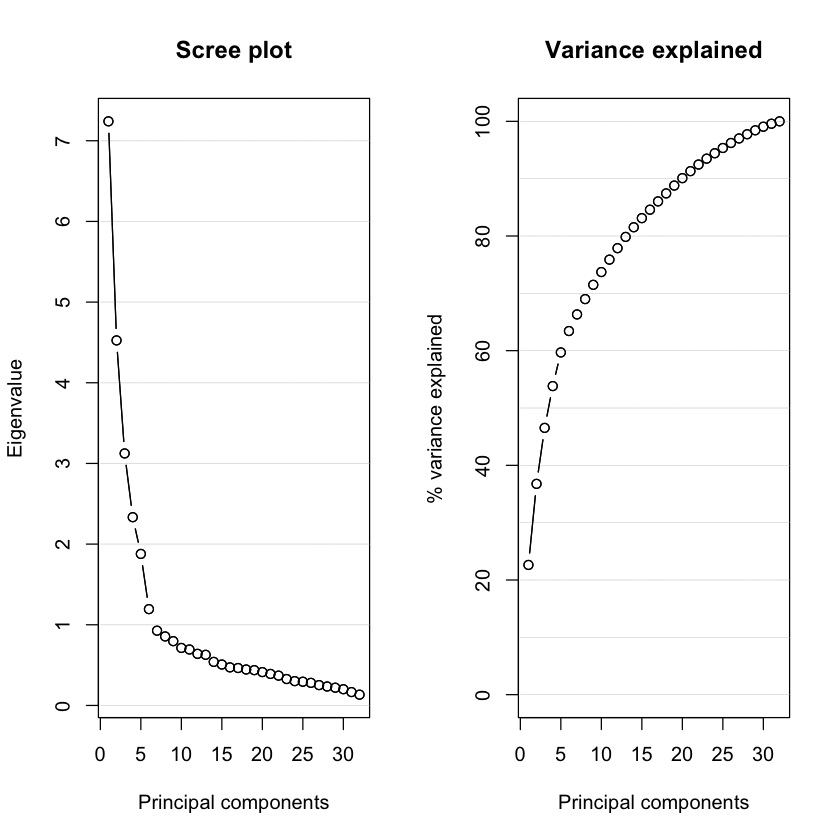

In [16]:
# Slide 40:

stanford.PC<- PCA(scale(stanford))

lambda<-eigen(cor(stanford))$values

data.frame(Eigenvalue=lambda,Proportion=round(lambda/32,digits=4),
           Cumulative=round(cumsum(lambda)/32,digits=4))[1:7,]

par(mfrow=c(1,2))
plot(1:32,lambda,type="b",xlab='Principal components',ylab='Eigenvalue',
     main="Scree plot")
for(i in 0:7){
  lines(0:35,rep(i,36),col="lightgrey",lwd=0.5)
  }
lines(1:32,lambda,type="b")
plot(1:32,100*cumsum(lambda)/sum(lambda),type="b",
     xlab='Principal components',ylab='% variance explained',
     main="Variance explained",ylim=c(0,100))
for(i in 0:10){
  lines(0:35,rep(10*i,36),col="lightgrey",lwd=0.5)
  }
lines(1:32,100*cumsum(lambda)/sum(lambda),type="b")
par(mfrow=c(1,1))

eigen(cor(stanford))$vectors[,1:6]

[1] 7.2407068 4.5250901 3.1240573 2.3335890 1.8783611 1.1940636 0.9268636
 [8] 0.8553802 0.7968460 0.7128793 0.6936229 0.6396893 0.6277046 0.5399600
[15] 0.5074253 0.4719721 0.4639916 0.4455816 0.4376430 0.4135706 0.3906941
[22] 0.3696839 0.3273829 0.3014077 0.2940833 0.2800131 0.2522101 0.2349649
[29] 0.2199461 0.2011492 0.1658493 0.1336176

0.2269974,-0.08136130,-0.11430619,0.024592445,0.22330027,-0.16281755
-0.1839826,0.09944509,0.35293897,-0.057072997,0.01206486,-0.03771747
0.1705592,0.19423134,0.17085298,-0.133911651,0.04499552,-0.37905011
-0.1617630,-0.26793008,0.06610459,0.001440412,0.12378589,-0.26010217
0.1390933,-0.17461656,0.11862257,-0.390410342,-0.02890474,-0.02300693
-0.1224702,0.08319317,-0.16608830,-0.355815283,0.14721109,-0.10586051


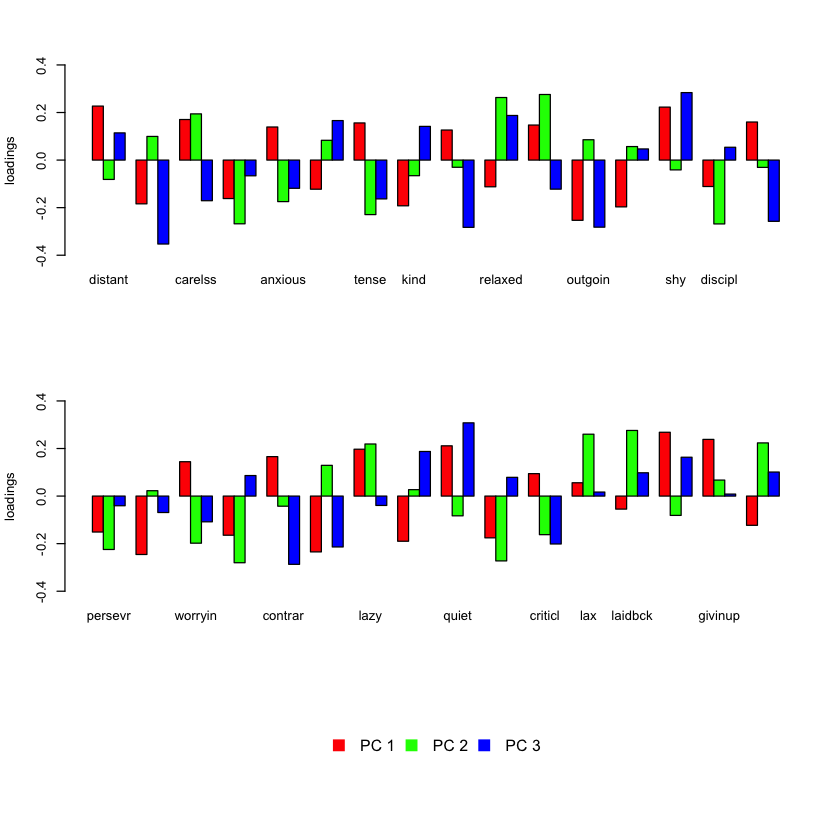

In [17]:
# Slide 41:

layout.matrix<-matrix(c(1,1,2,2,3),ncol=1)
layout(layout.matrix)
barplot(t(stanford.PC$loadings[1:16,1:3]), beside=T,col=rainbow(3),ylim=c(-0.4,0.4),
         names.arg=names(stanford)[1:16],ylab="loadings",main ="")
#box()

barplot(t(stanford.PC$loadings[17:32,1:3]), beside=T,col=rainbow(3),ylim=c(-0.4,0.4),
         names.arg=names(stanford)[17:32],ylab="loadings",
         main ="")
#box()

plot(1:10,1:10,pch="",xlab='',ylab='',axes=F)
legend(1,15,paste("PC",1:3),col=rainbow(3),pch=15,ncol=7,bty="n",
cex=1.2,pt.cex=2,x.intersp=1.5,xjust=-0.45)

eigen(cor(stanford))$values
head(eigen(cor(stanford))$vectors[,1:6])

In [22]:
# Slide 44:
library(psych)

#### Factor analysis 5 Factors #### 
fa5 <- principal(cor(stanford),nfactors = 5,rotate = "none") 
fa51 <- fa5$loadings[,1:5] 
fa5com <- fa5$communality 

In [23]:
# Slide 45:

# Factor patterns:
fa51

# variance explained:
colSums(fa51[,1:5]^2)

# total communality
sum(rowSums(fa51[,1:5]^2))
# or: sum(fa5com)

# single communalities:
fa5com

,PC1,PC2,PC3,PC4,PC5
distant,0.6108174,0.17307386,-0.20203622,-0.037567638,0.306040424
talkatv,-0.4950708,-0.21154217,0.62381974,0.087185220,0.016535284
carelss,0.4589504,-0.41317394,0.30198269,0.204564634,0.061667853
hardwrk,-0.4352810,0.56994781,0.11683989,-0.002200387,0.169652664
anxious,0.3742800,0.37144887,0.20966543,0.596394322,-0.039614905
agreebl,-0.3295498,-0.17697066,-0.29356111,0.543546601,0.201757683
tense,0.4202008,0.48765402,0.28847738,0.478482591,-0.090342768
kind,-0.5173413,0.13964962,-0.25041078,0.459294679,0.172018068
opposng,0.3399612,0.06427868,0.49982853,-0.061721681,0.423770871
relaxed,-0.3022070,-0.55956839,-0.33150925,-0.138276653,0.381187916


PC1      PC2      PC3      PC4      PC5 
7.240707 4.525090 3.124057 2.333589 1.878361

[1] 19.1018

distant   talkatv   carelss   hardwrk   anxious   agreebl     tense      kind 
0.5389432 0.6868710 0.5181913 0.5567485 0.6792749 0.5622489 0.7347018 0.5903914 
  opposng   relaxed   disorgn   outgoin   approvn       shy   discipl     harsh 
0.5529252 0.6787689 0.6024080 0.7602783 0.4574898 0.6443070 0.5023158 0.5801229 
  persevr   friendl   worryin   respnsi   contrar   sociabl      lazy   coopera 
0.4544547 0.6541906 0.6694197 0.6347127 0.6525244 0.6514983 0.5703197 0.5413985 
    quiet   organiz   criticl       lax   laidbck   withdrw   givinup   easygon 
0.7384347 0.6255638 0.5312194 0.4303089 0.6085848 0.6987745 0.4741584 0.5202546

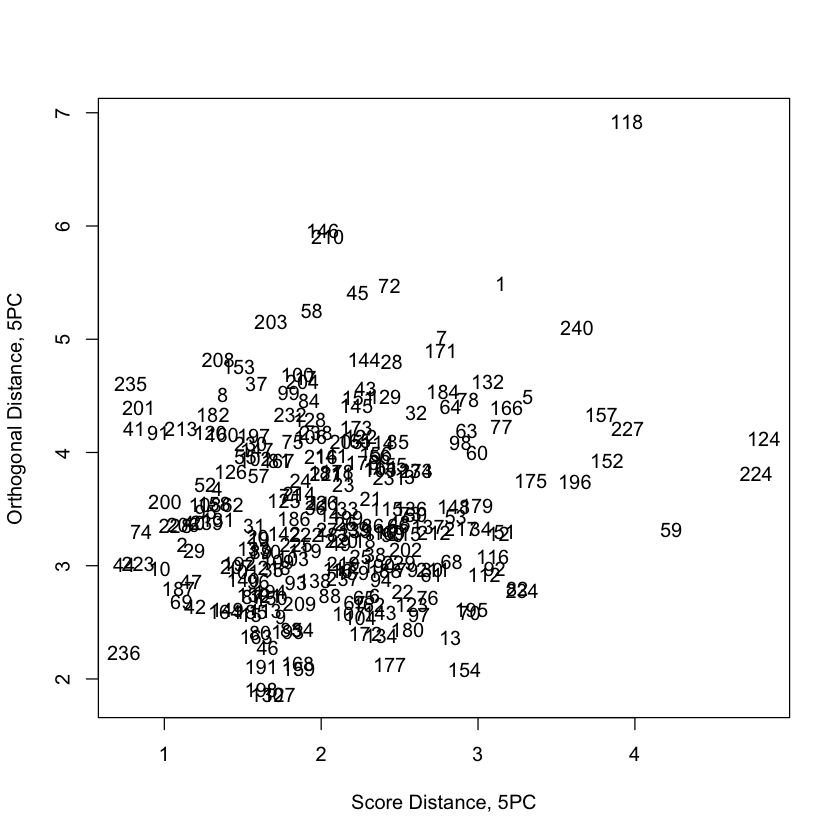

In [ ]:
#Slide 46:

stanford.PCA<- princomp(stanford, cor = TRUE)
res<-pcaDiagplot(stanford, stanford.PCA, a=5,plot=F)

plot(res$SDist, res$ODist, type="n",xlab="Score Distance, 5PC",
     ylab="Orthogonal Distance, 5PC")
text(res$SDist, res$ODist, labels=as.character(1:240))

In [25]:
# Slide 57:

#### Factor analysis 5 Factors #### 
fa5 <- principal(cor(stanford),nfactors = 5,rotate = "none") 
fa5l <- fa5$loadings[,1:5] 
fa5com <- fa5$communality 
#rotated: 
rfa5 <- principal(cor(stanford),nfactors = 5,rotate = "varimax") 
rfa5l <- rfa5$loadings[,1:5] 
rfa5com <- rfa5$communality 
#Factors 
Factors5 <- data.frame("FA" = fa5l,"Rot FA" = rfa5l) 

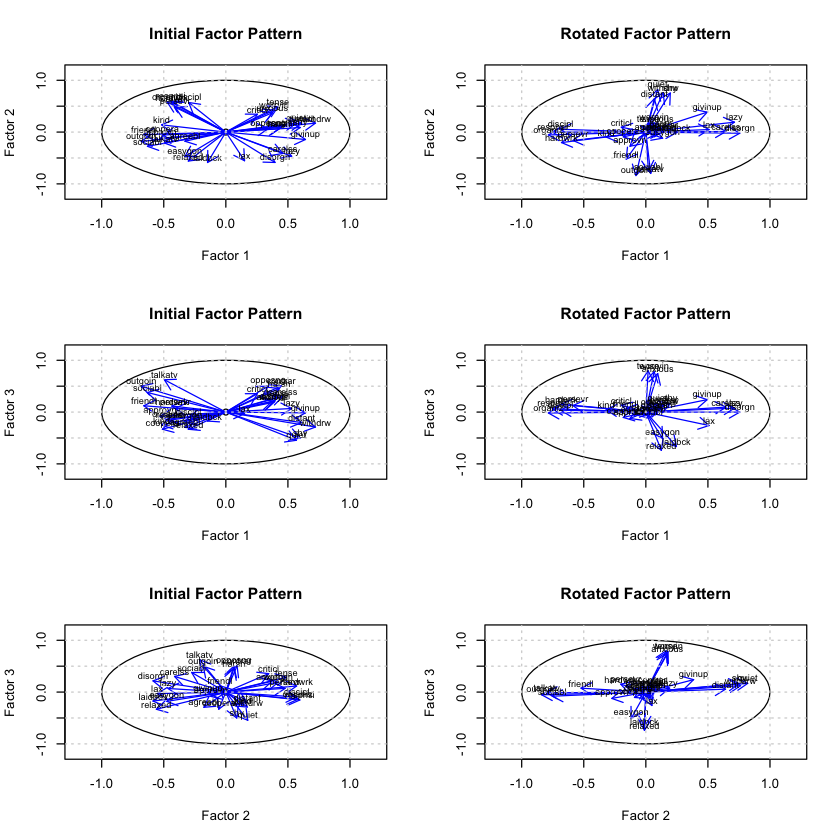

In [26]:
# Slide 58:

# Plots for factor analysis with 5 factors, without invoking a package: 
par(mfrow = c(3,2)) 
circle = seq(-3.2,3.2,by=0.1) 
# Different combinations of plots 
ij = matrix(c(1,1,2,2,3,3),ncol=2) 
Names = names(stanford)
for (i in 1:3){ 
	l = ij[i,1] 
	k = ij[i,2] 
	#Plot for the Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",l), ylab = paste0("Factor ",k),main = "Initial Factor Pattern") 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),fa5l[,l],fa5l[,k],length = 0.1,col="blue") 	
      text(fa5l[,l],fa5l[,k]+0.1,Names,cex = 0.7) 
	grid() 
	#Plot for rotated Factors 
	plot(0,0,xlim = c(-1.2,1.2),ylim = c(-1.2,1.2),xlab = paste0("Factor ",l), ylab = paste0("Factor ",k),main = "Rotated Factor Pattern") 
	points(1*cos(circle),1*sin(circle),type='l') 	
      arrows(c(rep(0,7)),c(rep(0,7)),rfa5l[,l],rfa5l[,k],length = 0.1,col="blue")
 	text(rfa5l[,l],rfa5l[,k]+0.1,Names,cex = 0.7) 
	grid() 
} 